In [1]:
import os
import cv2
import numpy as np
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import keras

#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

Using TensorFlow backend.


In [2]:
def mse(a,b):
    """function to compute the mean square error between two numpy arrays"""
    return np.square(a-b).mean()

def load_images(data_path):
    """Function to load images from NEU Dataset"""

    images=[] 
    labels=[] 

    for dirpath, dirnames, filenames in os.walk(data_path):
        for filename in filenames:
            defect=dirpath.split('\\')[-1] 
            if '.bmp' in filename:
                images.append(cv2.imread(os.path.join(dirpath,filename),0))
                labels.append(defect)

    images=np.asarray(images)
    labels=np.asarray(labels)

    return images, labels

In [3]:
data_path = r'C:\Users\mmatr\Desktop\Data Science\IBM Machine Learning\Git\IBM-Machine-Learning-Course\Course_5_Deep_Learning\NEU Metal Surface Defects Data'
os.chdir(data_path)

data, labels = load_images(data_path)

In [4]:
#this is necessary to get the data into the form that to_categorical requires, namely an array of numeric labels
le = LabelEncoder()

labels_ohe = keras.utils.to_categorical(le.fit_transform(labels).reshape(-1,1), 6)

## Normalize Data

In [5]:
data=data/255

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels_ohe, test_size=0.15)

In [7]:
X_train = X_train.reshape(len(X_train),200,200,1)
X_test = X_test.reshape(len(X_test),200,200,1)

# First Model

This model will be a contain a single convolution layer. And serve as the skeleton for subsequent models

In [8]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               19669248  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 19,670,950
Trainable params: 19,670,950
Non-trainable params: 0
__________________________________________

In [9]:
history_model1 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 13s 9ms/step - loss: 14.1424 - accuracy: 0.2980 - val_loss: 0.8708 - val_accuracy: 0.6407
Epoch 2/10
1530/1530 [==============================] - 13s 8ms/step - loss: 1.4007 - accuracy: 0.6275 - val_loss: 1.2793 - val_accuracy: 0.7407
Epoch 3/10
1530/1530 [==============================] - 12s 8ms/step - loss: 0.6550 - accuracy: 0.7908 - val_loss: 0.8926 - val_accuracy: 0.7148
Epoch 4/10
1530/1530 [==============================] - 12s 8ms/step - loss: 0.5302 - accuracy: 0.8105 - val_loss: 0.3675 - val_accuracy: 0.8704
Epoch 5/10
1530/1530 [==============================] - 12s 8ms/step - loss: 0.4413 - accuracy: 0.8588 - val_loss: 0.3955 - val_accuracy: 0.8370
Epoch 6/10
1530/1530 [==============================] - 12s 8ms/step - loss: 0.3547 - accuracy: 0.8895 - val_loss: 0.2861 - val_accuracy: 0.9111
Epoch 7/10
1530/1530 [==============================] - 12s 8ms/step - loss: 0.344

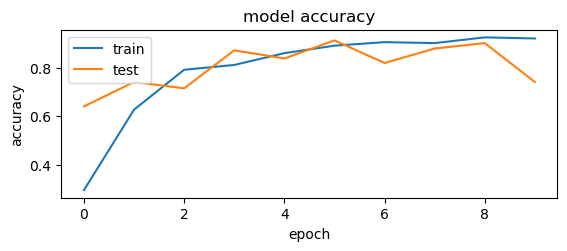

In [10]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model1.history['accuracy'])  
plt.plot(history_model1.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Adam Optimizer 

Else the same as above

In [11]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               19669248  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1542      
Total params: 19,670,950
Trainable params: 19,670,950
Non-trainable params: 0
__________________________________________

In [12]:
history_model1a = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 13s 9ms/step - loss: 11.1718 - accuracy: 0.3444 - val_loss: 0.9506 - val_accuracy: 0.5556
Epoch 2/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.7825 - accuracy: 0.7190 - val_loss: 0.3880 - val_accuracy: 0.8741
Epoch 3/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.5586 - accuracy: 0.8150 - val_loss: 0.4547 - val_accuracy: 0.8481
Epoch 4/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.4028 - accuracy: 0.8654 - val_loss: 0.3900 - val_accuracy: 0.8370
Epoch 5/10
1530/1530 [==============================] - 15s 10ms/step - loss: 0.3561 - accuracy: 0.8797 - val_loss: 0.3045 - val_accuracy: 0.9037
Epoch 6/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.3246 - accuracy: 0.8850 - val_loss: 0.3414 - val_accuracy: 0.8630
Epoch 7/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.28

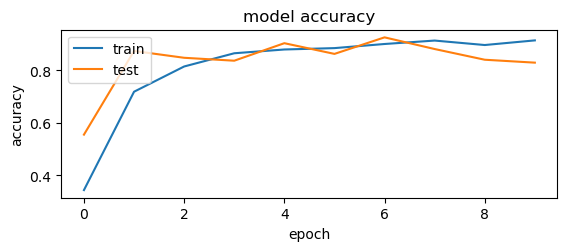

In [13]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model1a.history['accuracy'])  
plt.plot(history_model1a.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Model 2 

Attempt to reduce overfitting of model 1 - Smaller Dense layer

In [14]:
model = Sequential()
model.add(Conv2D(32, (2,2), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 199, 199, 32)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               9834624   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
Total params: 9,835,558
Trainable params: 9,835,558
Non-trainable params: 0
____________________________________________

In [15]:
history_model2 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 11s 7ms/step - loss: 19.5485 - accuracy: 0.2431 - val_loss: 2.0130 - val_accuracy: 0.5370
Epoch 2/10
1530/1530 [==============================] - 11s 7ms/step - loss: 2.1013 - accuracy: 0.5301 - val_loss: 1.9923 - val_accuracy: 0.4259
Epoch 3/10
1530/1530 [==============================] - 11s 7ms/step - loss: 0.9816 - accuracy: 0.6824 - val_loss: 2.6050 - val_accuracy: 0.5778
Epoch 4/10
1530/1530 [==============================] - 11s 7ms/step - loss: 0.6500 - accuracy: 0.7732 - val_loss: 0.4028 - val_accuracy: 0.8444
Epoch 5/10
1530/1530 [==============================] - 11s 7ms/step - loss: 0.5463 - accuracy: 0.8320 - val_loss: 0.3953 - val_accuracy: 0.8370
Epoch 6/10
1530/1530 [==============================] - 11s 7ms/step - loss: 0.4027 - accuracy: 0.8582 - val_loss: 0.4289 - val_accuracy: 0.8593
Epoch 7/10
1530/1530 [==============================] - 11s 7ms/step - loss: 0.393

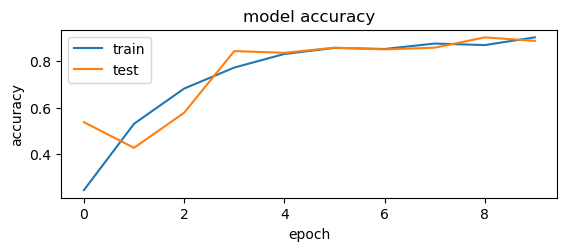

In [16]:

plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model2.history['accuracy'])  
plt.plot(history_model2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Filter size test

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(4, 4))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               19669248  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1542      
Total params: 19,671,110
Trainable params: 19,671,110
Non-trainable params: 0
__________________________________________

In [18]:
history_model3 = model.fit(X_train,y_train,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 14s 9ms/step - loss: 17.6660 - accuracy: 0.3033 - val_loss: 1.7512 - val_accuracy: 0.3926
Epoch 2/10
1530/1530 [==============================] - 14s 9ms/step - loss: 1.3891 - accuracy: 0.5673 - val_loss: 1.3198 - val_accuracy: 0.4593
Epoch 3/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.8351 - accuracy: 0.7176 - val_loss: 0.8248 - val_accuracy: 0.7667
Epoch 4/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.7639 - accuracy: 0.7634 - val_loss: 0.7913 - val_accuracy: 0.5926
Epoch 5/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.7869 - accuracy: 0.7824 - val_loss: 0.4106 - val_accuracy: 0.8667
Epoch 6/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.5204 - accuracy: 0.8510 - val_loss: 1.1427 - val_accuracy: 0.6259
Epoch 7/10
1530/1530 [==============================] - 14s 9ms/step - loss: 0.585

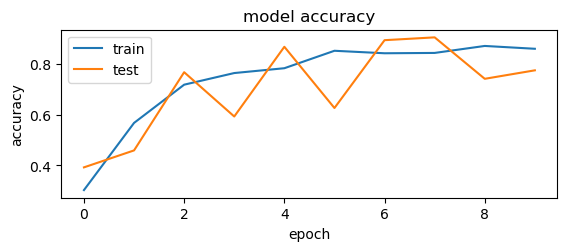

In [19]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model3.history['accuracy'])  
plt.plot(history_model3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# Model with a second convolution layer

In [20]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               18874624  
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

In [21]:
history_model4 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 29s 19ms/step - loss: 2.5360 - accuracy: 0.3542 - val_loss: 1.1008 - val_accuracy: 0.5370
Epoch 2/10
1530/1530 [==============================] - 29s 19ms/step - loss: 0.9055 - accuracy: 0.6405 - val_loss: 0.6167 - val_accuracy: 0.8222
Epoch 3/10
1530/1530 [==============================] - 29s 19ms/step - loss: 0.5792 - accuracy: 0.7980 - val_loss: 0.4101 - val_accuracy: 0.8741
Epoch 4/10
1530/1530 [==============================] - 29s 19ms/step - loss: 0.5822 - accuracy: 0.8013 - val_loss: 0.4430 - val_accuracy: 0.8407
Epoch 5/10
1530/1530 [==============================] - 29s 19ms/step - loss: 0.4363 - accuracy: 0.8497 - val_loss: 0.4278 - val_accuracy: 0.8407
Epoch 6/10
1530/1530 [==============================] - 29s 19ms/step - loss: 0.5200 - accuracy: 0.8131 - val_loss: 0.6721 - val_accuracy: 0.7815
Epoch 7/10
1530/1530 [==============================] - 29s 19ms/step - loss:

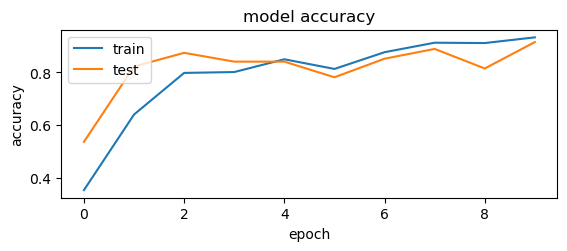

In [22]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model4.history['accuracy'])  
plt.plot(history_model4.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

## Increasing the number of filters on the second convolution layer

In [23]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               37748992  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)              

In [24]:
history_model4_2 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=20,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/20
1530/1530 [==============================] - 40s 26ms/step - loss: 2.7792 - accuracy: 0.3242 - val_loss: 1.0848 - val_accuracy: 0.5407
Epoch 2/20
1530/1530 [==============================] - 39s 26ms/step - loss: 1.0208 - accuracy: 0.6484 - val_loss: 0.8199 - val_accuracy: 0.6815
Epoch 3/20
1530/1530 [==============================] - 40s 26ms/step - loss: 0.7448 - accuracy: 0.7438 - val_loss: 0.6451 - val_accuracy: 0.8000
Epoch 4/20
1530/1530 [==============================] - 39s 26ms/step - loss: 0.5569 - accuracy: 0.8144 - val_loss: 0.7972 - val_accuracy: 0.7296
Epoch 5/20
1530/1530 [==============================] - 40s 26ms/step - loss: 0.6620 - accuracy: 0.7784 - val_loss: 0.4793 - val_accuracy: 0.8481
Epoch 6/20
1530/1530 [==============================] - 39s 26ms/step - loss: 0.4196 - accuracy: 0.8667 - val_loss: 0.7264 - val_accuracy: 0.7704
Epoch 7/20
1530/1530 [==============================] - 40s 26ms/step - loss:

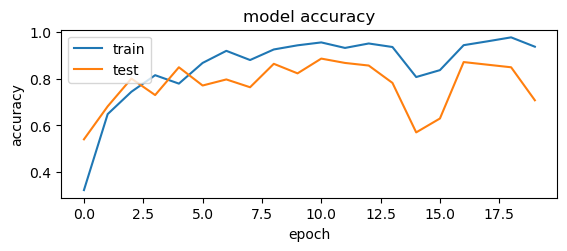

In [25]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model4_2.history['accuracy'])  
plt.plot(history_model4_2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 3 Convolution Layers
Third layer the same depth as the second.

In [26]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 33856)            

In [27]:
history_model5b = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 36s 23ms/step - loss: 1.7020 - accuracy: 0.3569 - val_loss: 1.0536 - val_accuracy: 0.5185
Epoch 2/10
1530/1530 [==============================] - 36s 23ms/step - loss: 1.3566 - accuracy: 0.4882 - val_loss: 1.1807 - val_accuracy: 0.5963
Epoch 3/10
1530/1530 [==============================] - 36s 24ms/step - loss: 0.9579 - accuracy: 0.6471 - val_loss: 0.7845 - val_accuracy: 0.6926
Epoch 4/10
1530/1530 [==============================] - 36s 24ms/step - loss: 0.5323 - accuracy: 0.8196 - val_loss: 1.0914 - val_accuracy: 0.6593
Epoch 5/10
1530/1530 [==============================] - 36s 23ms/step - loss: 0.3758 - accuracy: 0.8725 - val_loss: 0.3118 - val_accuracy: 0.8963
Epoch 6/10
1530/1530 [==============================] - 36s 23ms/step - loss: 0.4329 - accuracy: 0.8536 - val_loss: 0.8181 - val_accuracy: 0.6667
Epoch 7/10
1530/1530 [==============================] - 36s 24ms/step - loss:

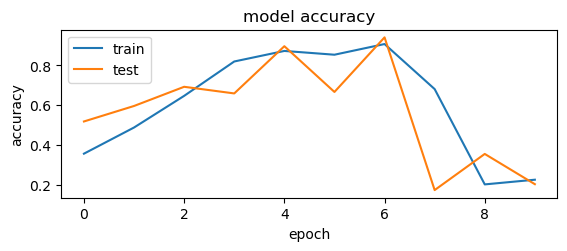

In [28]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5b.history['accuracy'])  
plt.plot(history_model5b.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 3 Convolution Layers

geometrically increasing depths

In [29]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 67712)            

In [30]:
history_model5 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=20,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/20
1530/1530 [==============================] - 43s 28ms/step - loss: 1.6867 - accuracy: 0.3693 - val_loss: 1.2168 - val_accuracy: 0.5000
Epoch 2/20
1530/1530 [==============================] - 43s 28ms/step - loss: 0.8039 - accuracy: 0.7007 - val_loss: 0.4872 - val_accuracy: 0.8370
Epoch 3/20
1530/1530 [==============================] - 43s 28ms/step - loss: 0.5663 - accuracy: 0.7882 - val_loss: 0.3838 - val_accuracy: 0.8778
Epoch 4/20
1530/1530 [==============================] - 43s 28ms/step - loss: 0.3813 - accuracy: 0.8725 - val_loss: 0.4536 - val_accuracy: 0.8000
Epoch 5/20
1530/1530 [==============================] - 42s 28ms/step - loss: 0.4141 - accuracy: 0.8477 - val_loss: 0.2469 - val_accuracy: 0.9185
Epoch 6/20
1530/1530 [==============================] - 42s 28ms/step - loss: 0.2537 - accuracy: 0.9163 - val_loss: 0.1904 - val_accuracy: 0.9333
Epoch 7/20
1530/1530 [==============================] - 43s 28ms/step - loss:

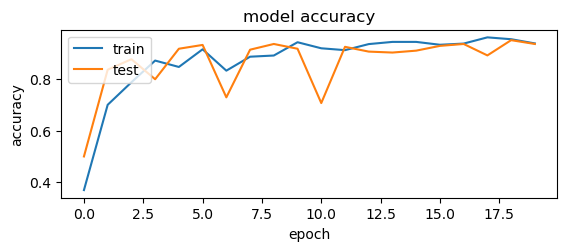

In [31]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5.history['accuracy'])  
plt.plot(history_model5.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 3 Convolution Layers

geometrically increasing depths - smaller filter size

In [32]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 67712)            

In [33]:
history_model5n = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 40s 26ms/step - loss: 1.5711 - accuracy: 0.4275 - val_loss: 0.6824 - val_accuracy: 0.7741
Epoch 2/10
1530/1530 [==============================] - 40s 26ms/step - loss: 0.5614 - accuracy: 0.7928 - val_loss: 0.3068 - val_accuracy: 0.8926
Epoch 3/10
1530/1530 [==============================] - 41s 27ms/step - loss: 0.3953 - accuracy: 0.8582 - val_loss: 0.2694 - val_accuracy: 0.9222
Epoch 4/10
1530/1530 [==============================] - 41s 27ms/step - loss: 0.3283 - accuracy: 0.8843 - val_loss: 0.2881 - val_accuracy: 0.9185
Epoch 5/10
1530/1530 [==============================] - 40s 26ms/step - loss: 0.4955 - accuracy: 0.8320 - val_loss: 0.7097 - val_accuracy: 0.7333
Epoch 6/10
1530/1530 [==============================] - 40s 26ms/step - loss: 0.3296 - accuracy: 0.8797 - val_loss: 0.1840 - val_accuracy: 0.9370
Epoch 7/10
1530/1530 [==============================] - 40s 26ms/step - loss:

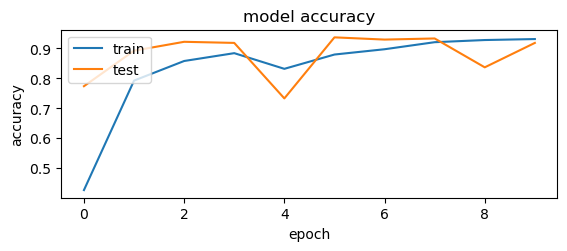

In [34]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5n.history['accuracy'])  
plt.plot(history_model5n.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# 3 Convolutions

rmsprop optimizer


In [35]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 198, 198, 32)      320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 67712)           

In [36]:
history_model5rms = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 39s 26ms/step - loss: 3.3673 - accuracy: 0.2752 - val_loss: 1.5974 - val_accuracy: 0.3815
Epoch 2/10
1530/1530 [==============================] - 40s 26ms/step - loss: 1.7686 - accuracy: 0.3105 - val_loss: 1.4896 - val_accuracy: 0.3296
Epoch 3/10
1530/1530 [==============================] - 39s 26ms/step - loss: 1.3357 - accuracy: 0.5007 - val_loss: 0.9778 - val_accuracy: 0.6481
Epoch 4/10
1530/1530 [==============================] - 39s 26ms/step - loss: 0.9870 - accuracy: 0.6667 - val_loss: 0.9737 - val_accuracy: 0.5667
Epoch 5/10
1530/1530 [==============================] - 40s 26ms/step - loss: 0.6985 - accuracy: 0.7660 - val_loss: 0.2766 - val_accuracy: 0.9296
Epoch 6/10
1530/1530 [==============================] - 39s 26ms/step - loss: 0.6862 - accuracy: 0.7830 - val_loss: 0.3106 - val_accuracy: 0.8963
Epoch 7/10
1530/1530 [==============================] - 39s 26ms/step - loss:

In [37]:
history_model5rms2 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 39s 26ms/step - loss: 0.3897 - accuracy: 0.8876 - val_loss: 13.0736 - val_accuracy: 0.3407
Epoch 2/10
1530/1530 [==============================] - 39s 25ms/step - loss: 0.7012 - accuracy: 0.8739 - val_loss: 0.2898 - val_accuracy: 0.8667
Epoch 3/10
1530/1530 [==============================] - 39s 26ms/step - loss: 0.2769 - accuracy: 0.9144 - val_loss: 0.2922 - val_accuracy: 0.8963
Epoch 4/10
1530/1530 [==============================] - 39s 26ms/step - loss: 0.2220 - accuracy: 0.9196 - val_loss: 0.1402 - val_accuracy: 0.9481
Epoch 5/10
1530/1530 [==============================] - 39s 25ms/step - loss: 0.4668 - accuracy: 0.9333 - val_loss: 0.1616 - val_accuracy: 0.9444
Epoch 6/10
1530/1530 [==============================] - 39s 26ms/step - loss: 0.4380 - accuracy: 0.9111 - val_loss: 1.2399 - val_accuracy: 0.7148
Epoch 7/10
1530/1530 [==============================] - 39s 25ms/step - loss

In [38]:
history_model5rms3 = model.fit(X_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(X_test,y_test),
        verbose=1, shuffle=True)

Train on 1530 samples, validate on 270 samples
Epoch 1/10
1530/1530 [==============================] - 39s 25ms/step - loss: 0.3345 - accuracy: 0.9222 - val_loss: 0.4041 - val_accuracy: 0.8926
Epoch 2/10
1530/1530 [==============================] - 39s 25ms/step - loss: 0.5739 - accuracy: 0.9209 - val_loss: 0.3390 - val_accuracy: 0.9000
Epoch 3/10
1530/1530 [==============================] - 39s 26ms/step - loss: 0.6430 - accuracy: 0.9477 - val_loss: 0.2805 - val_accuracy: 0.9148
Epoch 4/10
1530/1530 [==============================] - 39s 25ms/step - loss: 0.1657 - accuracy: 0.9484 - val_loss: 0.4276 - val_accuracy: 0.8963
Epoch 5/10
1530/1530 [==============================] - 39s 26ms/step - loss: 0.2086 - accuracy: 0.9569 - val_loss: 0.2230 - val_accuracy: 0.9333
Epoch 6/10
1530/1530 [==============================] - 39s 25ms/step - loss: 1.6740 - accuracy: 0.9301 - val_loss: 0.2844 - val_accuracy: 0.9000
Epoch 7/10
1530/1530 [==============================] - 39s 26ms/step - loss:

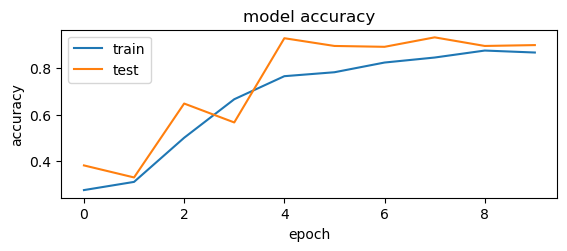

In [39]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5rms.history['accuracy'])  
plt.plot(history_model5rms.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

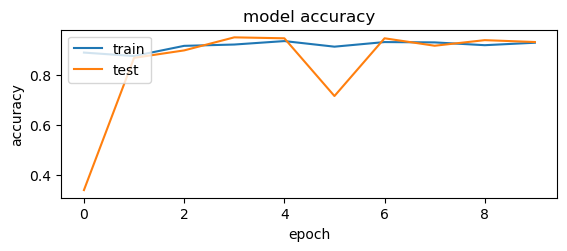

In [40]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5rms2.history['accuracy'])  
plt.plot(history_model5rms2.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

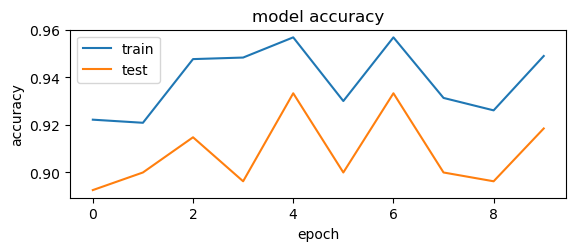

In [41]:
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history_model5rms3.history['accuracy'])  
plt.plot(history_model5rms3.history['val_accuracy'])
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()